# Logistic Regression Project (Predict Ad click)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("advertising.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

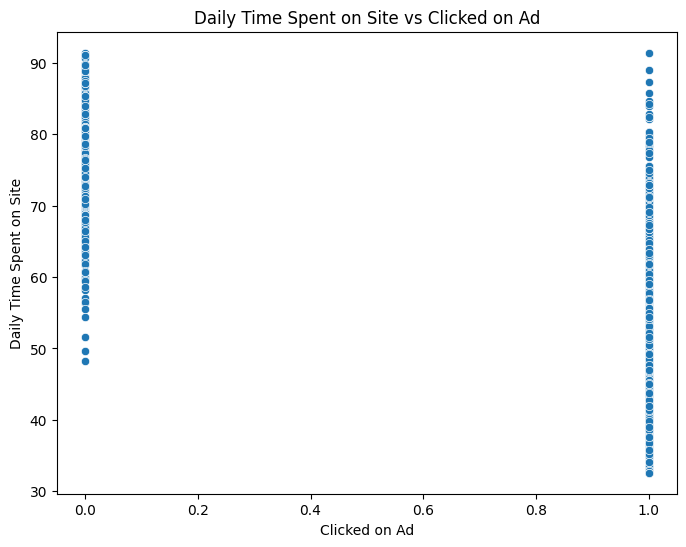

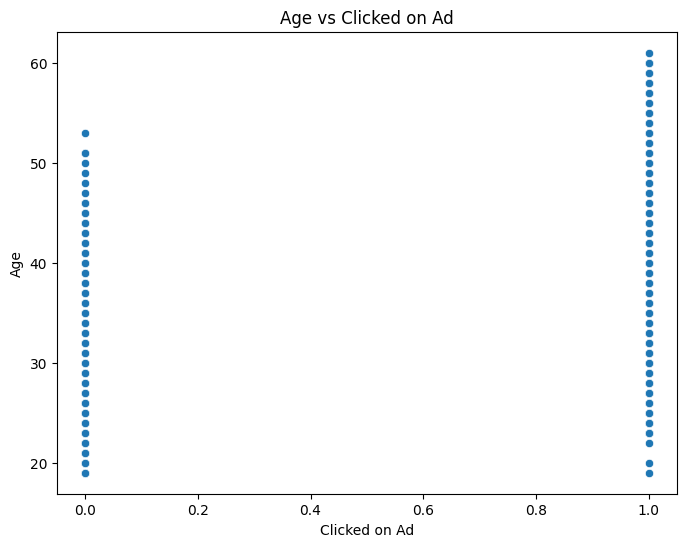

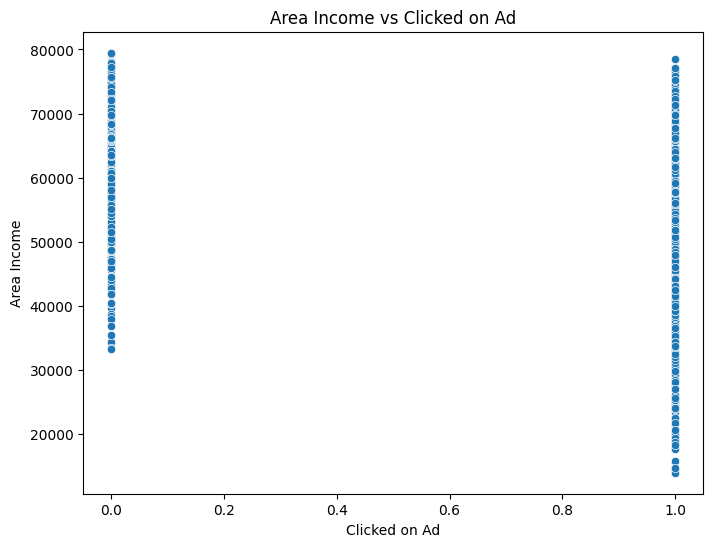

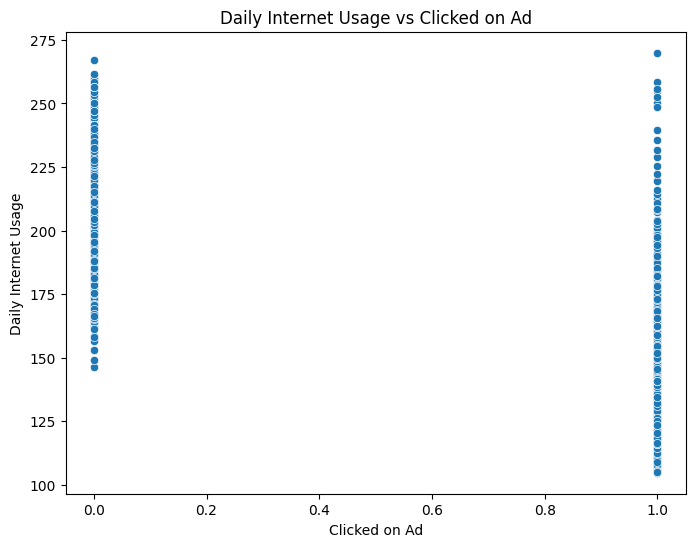

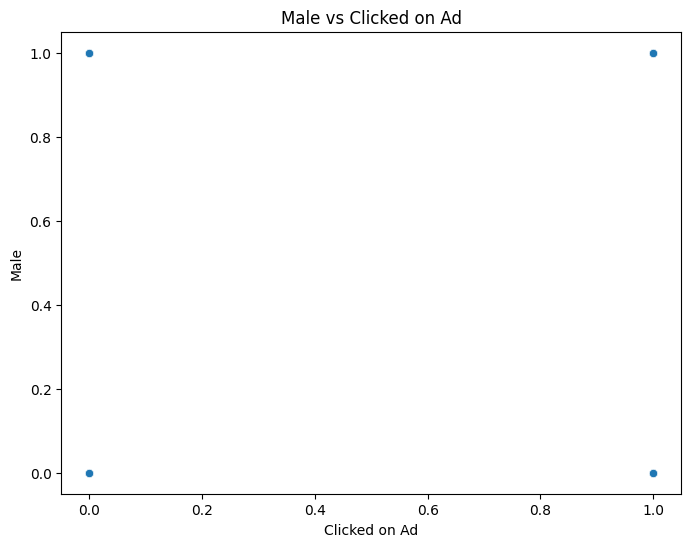

In [29]:
columns_to_plot = data.columns.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'])

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Clicked on Ad', y=column, data=data)
    plt.title(f"{column} vs Clicked on Ad")
    plt.show()


<ipython-input-30-f704f9deedb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

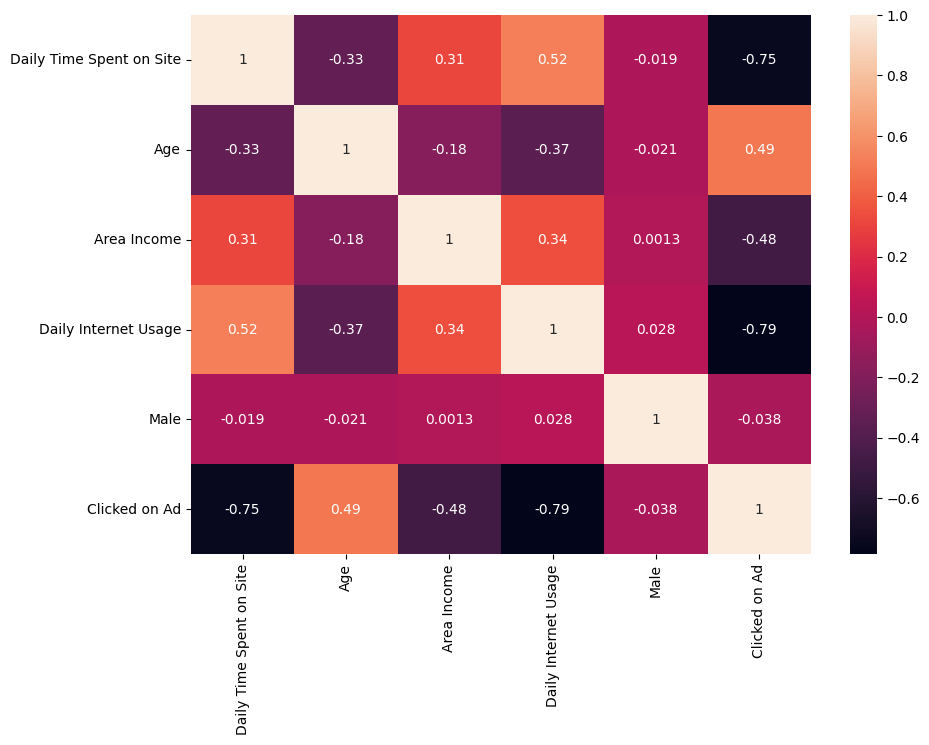

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


X = data['Age']
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


In [36]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression()
X_train_reshaped = np.array(X_train).reshape(-1, 1)

lr_clf.fit(X_train_reshaped, y_train)

pred = lr_clf.predict(X_train_reshaped)

print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Accuracy Score: 70.29%
Confusion Matrix: 
 [[270  84]
 [124 222]]



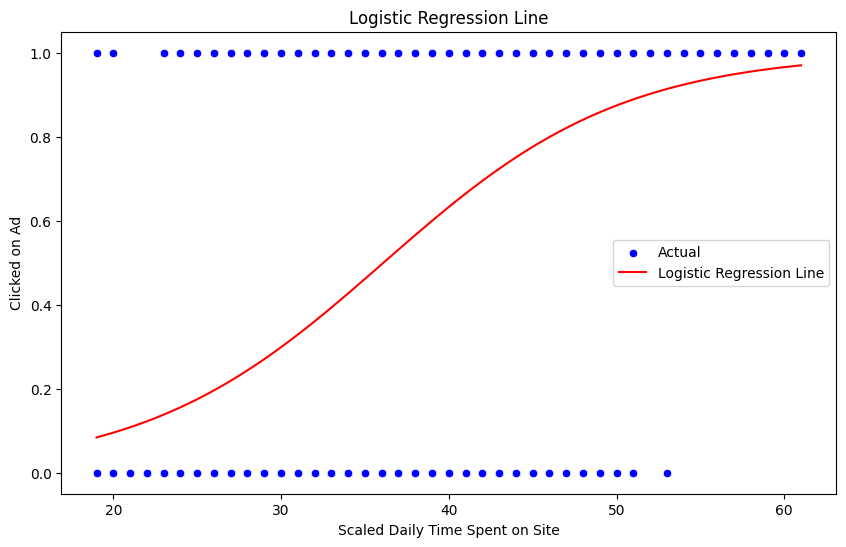

In [38]:
# Scatter plot of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train, y=y_train, color='blue', label='Actual')

# Logistic Regression Line
x_values = np.linspace(np.min(X_train), np.max(X_train), 100)
intercept = lr_clf.intercept_
slope = lr_clf.coef_[0][0]
logit_line = intercept + slope * x_values
sigmoid_line = 1 / (1 + np.exp(-logit_line))

plt.plot(x_values, sigmoid_line, color='red', label='Logistic Regression Line')
plt.xlabel('Scaled Daily Time Spent on Site')
plt.ylabel('Clicked on Ad')
plt.legend()
plt.title('Logistic Regression Line')
plt.show()